In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

from sklearn.metrics  import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

plt.rcParams['figure.figsize'] = (20, 6)

In [3]:
temps_state = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv')
temps_gl = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")


In [4]:
temps_state = temps_state.loc[temps_state['Country'] == "India"]
temps_state.head(15)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
24709,1796-01-01,26.534,1.904,Andaman And Nicobar,India
24710,1796-02-01,26.294,1.122,Andaman And Nicobar,India
24711,1796-03-01,26.180,1.959,Andaman And Nicobar,India
24712,1796-04-01,27.942,1.281,Andaman And Nicobar,India
24713,1796-05-01,28.651,1.119,Andaman And Nicobar,India
24714,1796-06-01,28.307,2.699,Andaman And Nicobar,India
24715,1796-07-01,27.482,1.997,Andaman And Nicobar,India
24716,1796-08-01,28.025,2.679,Andaman And Nicobar,India
24717,1796-09-01,27.185,3.072,Andaman And Nicobar,India
24718,1796-10-01,26.808,1.121,Andaman And Nicobar,India


In [5]:
# changing the data type of "dt" feature
temps_state['dt'] = pd.to_datetime(temps_state['dt'])
temps_gl['dt'] = pd.to_datetime(temps_gl['dt'])

In [6]:
# last date of the record
print("Last record for global temperatures: ",max(temps_gl['dt']))
print("Last record for India's temperatures: ",max(temps_state['dt']))

# first date of the record
print("First record for global temperatures: ",min(temps_gl['dt']))
print("First record for India's temperatures: ",min(temps_state['dt']))

Last record for global temperatures:  2015-12-01 00:00:00
Last record for India's temperatures:  2013-09-01 00:00:00
First record for global temperatures:  1750-01-01 00:00:00
First record for India's temperatures:  1796-01-01 00:00:00


In [7]:
print("Indian states dataset: ")
temps_state.info()

print()
print("*"*50)
print()

print("Global temperatures dataset: ")
temps_gl.info()

Indian states dataset: 
<class 'pandas.core.frame.DataFrame'>
Index: 86664 entries, 24709 to 615161
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             86664 non-null  datetime64[ns]
 1   AverageTemperature             81620 non-null  float64       
 2   AverageTemperatureUncertainty  81620 non-null  float64       
 3   State                          86664 non-null  object        
 4   Country                        86664 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.0+ MB

**************************************************

Global temperatures dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     ------------

In [8]:
# % of missing values
print("for global temperatures dataset: ")
print(temps_gl.isnull().sum()*100/ temps_gl.shape[0])

print()
print("*"*50)
print()

print("for global temperatures dataset: ")
print(temps_state.isnull().sum()*100/ temps_state.shape[0])

for global temperatures dataset: 
dt                                            0.000000
LandAverageTemperature                        0.375940
LandAverageTemperatureUncertainty             0.375940
LandMaxTemperature                           37.593985
LandMaxTemperatureUncertainty                37.593985
LandMinTemperature                           37.593985
LandMinTemperatureUncertainty                37.593985
LandAndOceanAverageTemperature               37.593985
LandAndOceanAverageTemperatureUncertainty    37.593985
dtype: float64

**************************************************

for global temperatures dataset: 
dt                               0.000000
AverageTemperature               5.820179
AverageTemperatureUncertainty    5.820179
State                            0.000000
Country                          0.000000
dtype: float64


In [9]:
# statistical information
print("Indian states: ")
print(temps_state.describe())

print()
print("*"*50)
print()

print("Global temperature: ")
print(temps_gl.describe())

Indian states: 
                                  dt  AverageTemperature  \
count                          86664        81620.000000   
mean   1907-04-26 08:54:25.023539200           22.534576   
min              1796-01-01 00:00:00          -11.984000   
25%              1854-06-01 00:00:00           19.063000   
50%              1907-07-01 00:00:00           25.094500   
75%              1960-08-01 00:00:00           27.628000   
max              2013-09-01 00:00:00           36.339000   
std                              NaN            7.749321   

       AverageTemperatureUncertainty  
count                   81620.000000  
mean                        0.868932  
min                         0.064000  
25%                         0.342000  
50%                         0.538500  
75%                         1.277000  
max                         7.447000  
std                         0.757877  

**************************************************

Global temperature: 
                  

In [10]:
# setting index to date for both the database

temps_gl.set_index("dt", inplace  = True)
temps_state.set_index("dt", inplace = True)

Let's aggregate this monthly data to yearly data, using "resampling".

In [11]:
temps_gl["year"] = temps_gl.index.year

In [12]:
df_gl = temps_gl.resample("YE").mean()

<Axes: xlabel='dt'>

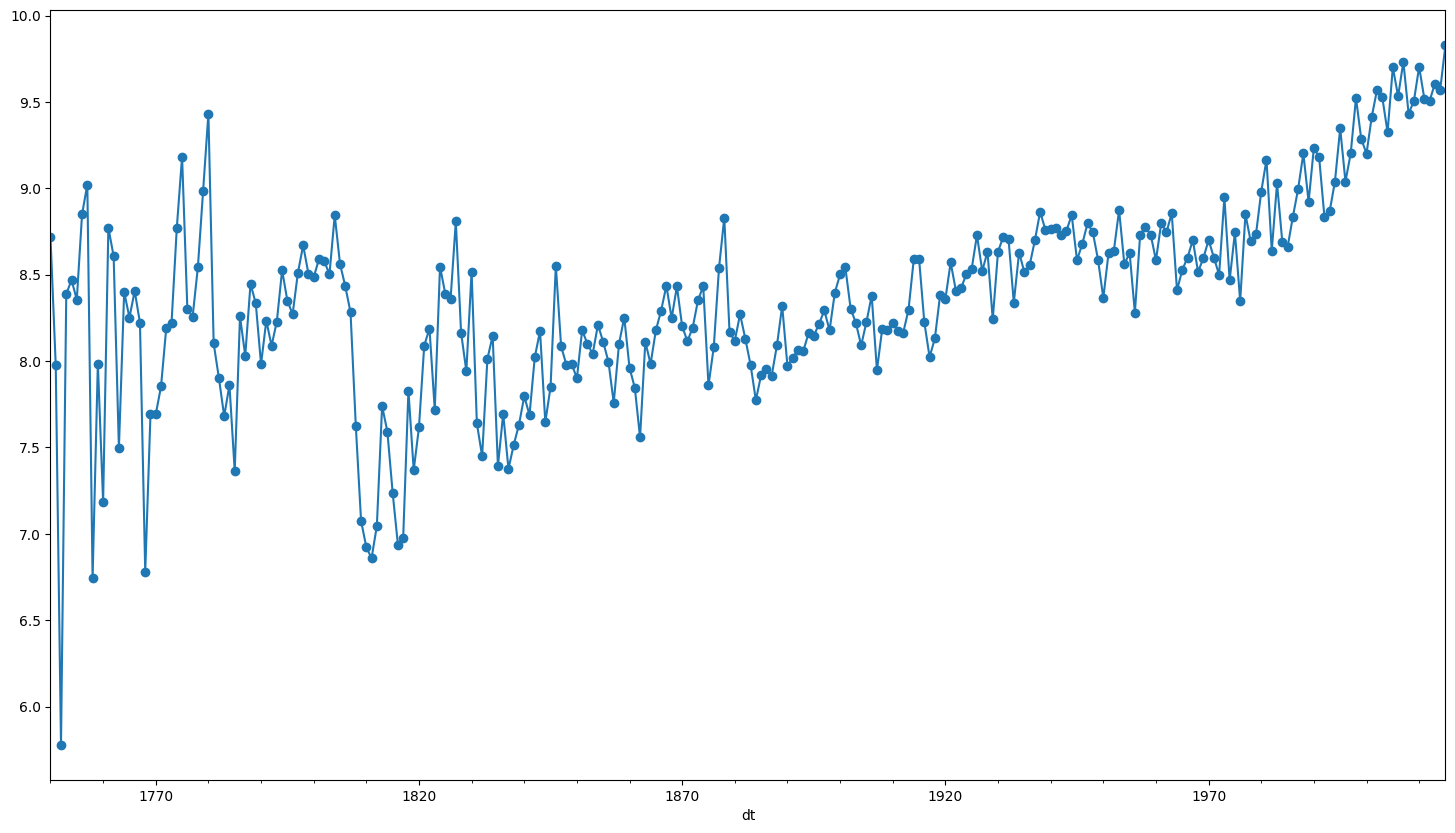

In [13]:
plt.figure(figsize = (18,10))
df_gl['LandAverageTemperature'].plot(style = "-o")

In [14]:
df_gl[df_gl['LandAverageTemperature'].isnull()]

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
dt,,,,,,,,,


### Anamolies Handing

In [15]:
fig = px.histogram(df_gl, x="LandAverageTemperature", nbins = 200)
fig.update_layout(title = 'Histogram for global land average temperatures')
fig.show()

<Axes: xlabel='dt'>

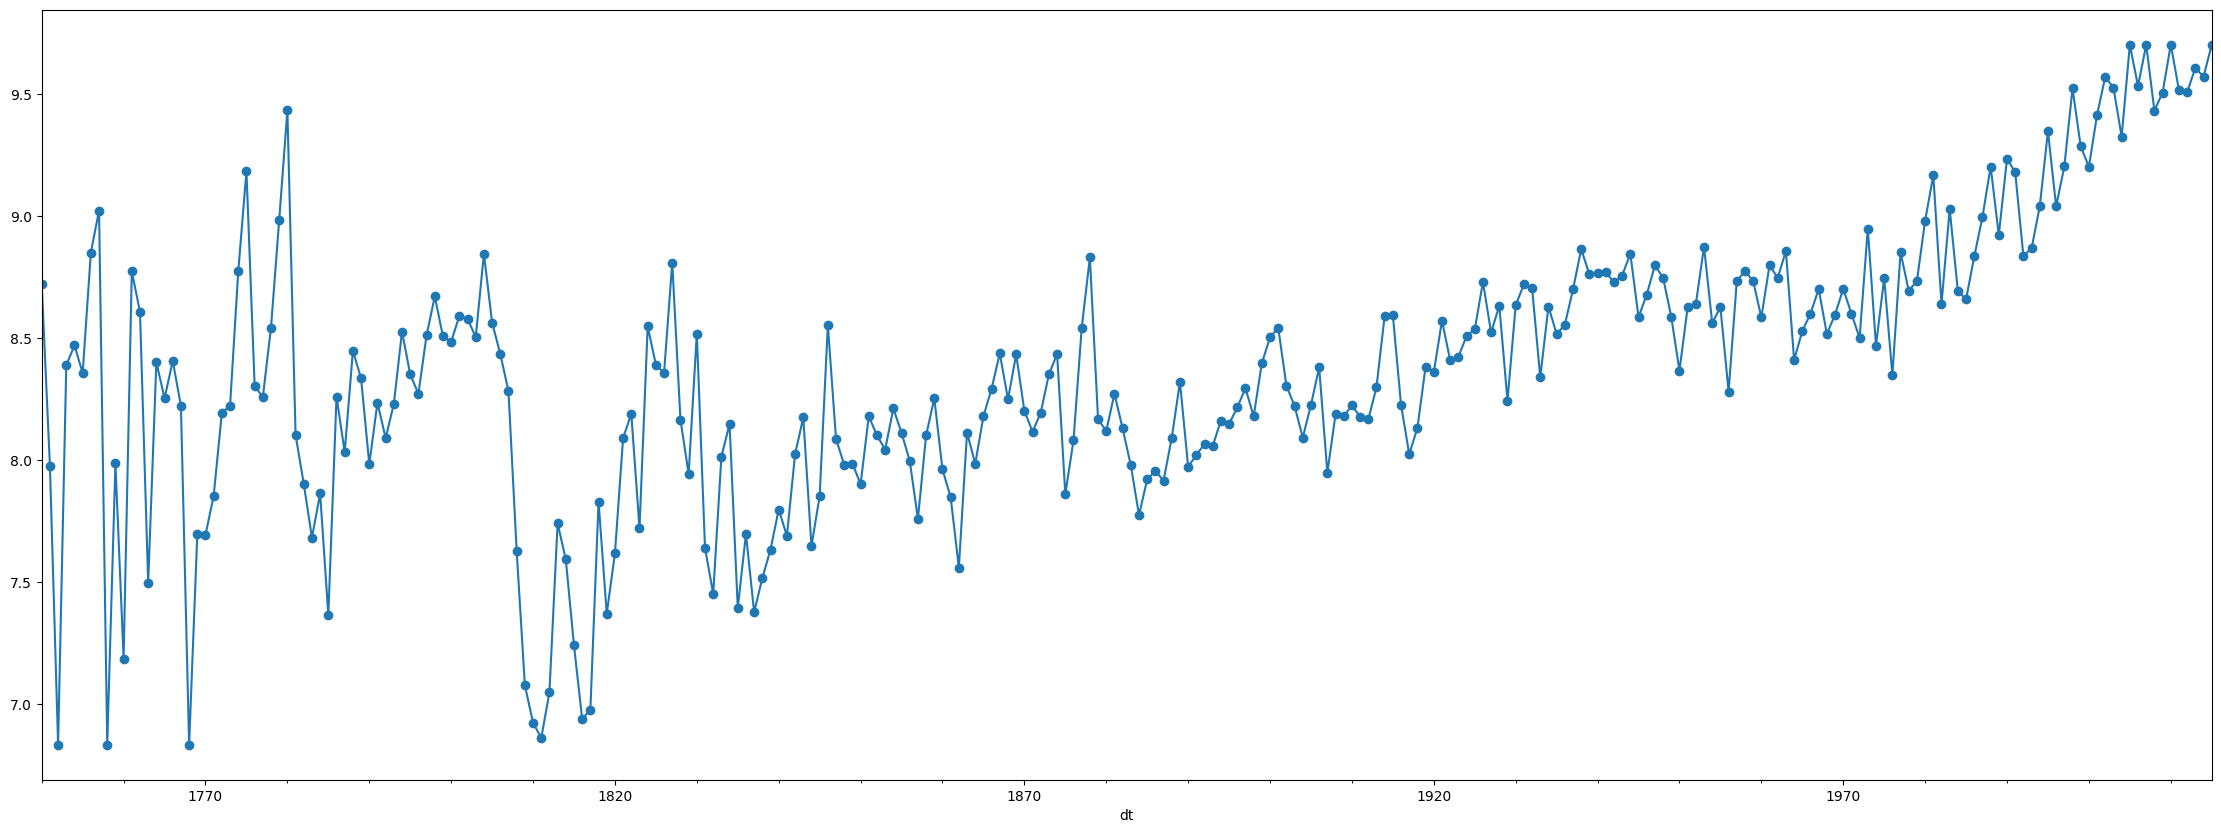

In [16]:
# removing the analmolies using "clip"
plt.figure(figsize=(28,10))
df_gl['LandAverageTemperature'] = (df_gl['LandAverageTemperature'].clip(upper = df_gl["LandAverageTemperature"].quantile(0.99),
                                        lower = df_gl['LandAverageTemperature'].quantile(0.01)))

df_gl['LandAverageTemperature'].plot(style = "-o")

#### Finding the **trend**

<Axes: xlabel='dt'>

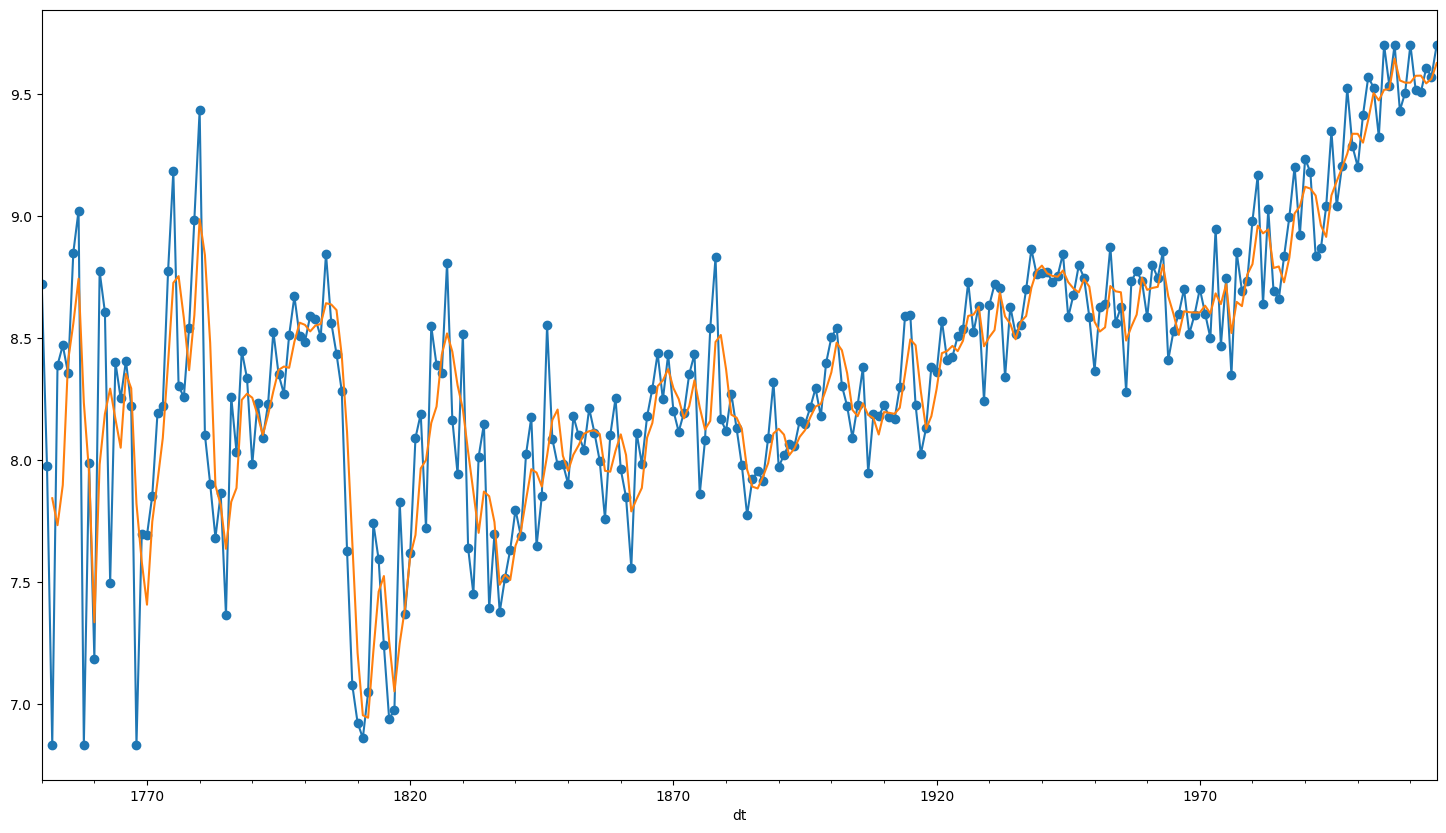

In [17]:
# moving average for k = 3
plt.figure(figsize = (18,10))
df_gl['LandAverageTemperature'].plot(style = "-o")
df_gl['LandAverageTemperature'].rolling(3).mean().plot()

<Axes: xlabel='dt'>

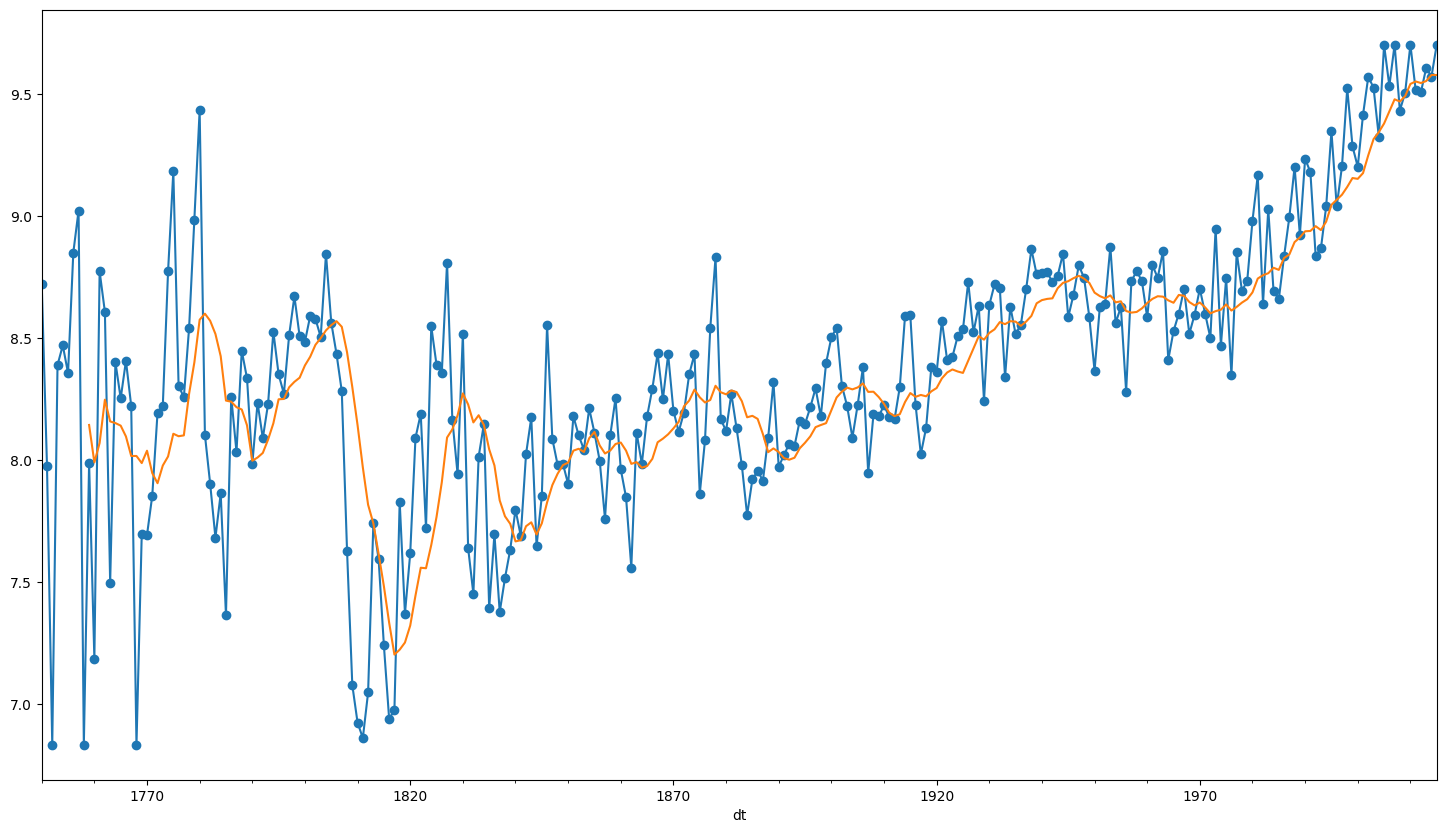

In [18]:
# moving average for k = 10
plt.figure(figsize = (18,10))
df_gl['LandAverageTemperature'].plot(style = "-o")
df_gl['LandAverageTemperature'].rolling(10).mean().plot()

<Axes: xlabel='dt'>

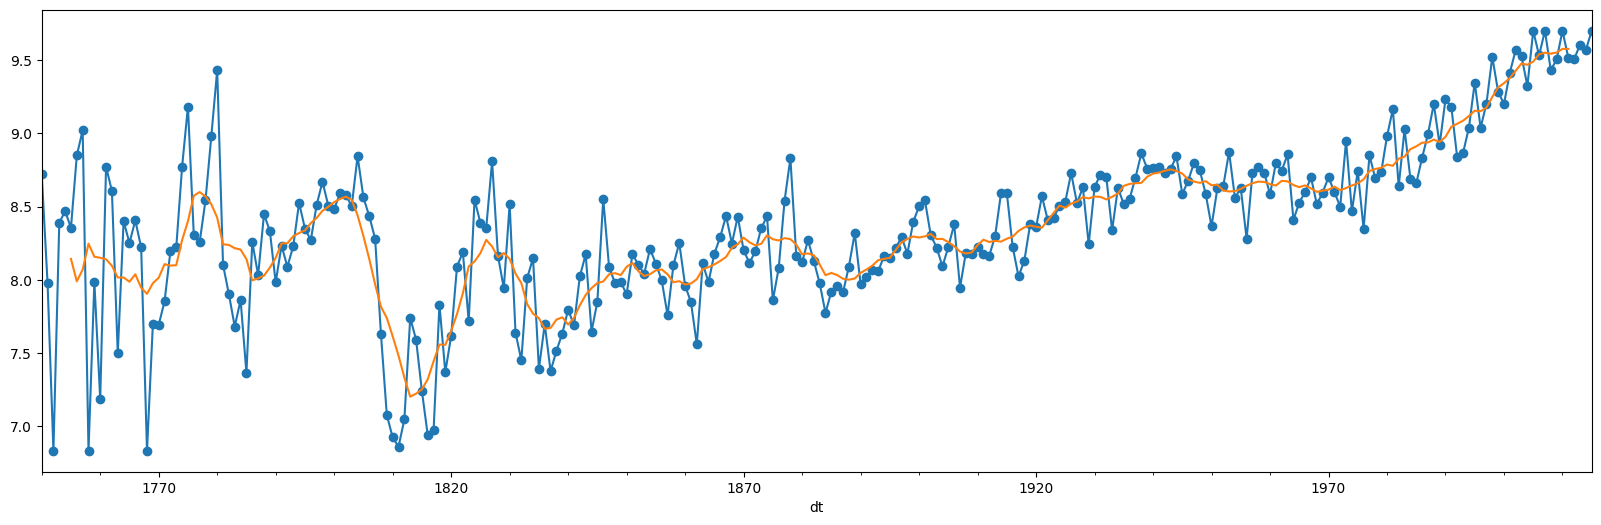

In [19]:
# centered moving average

df_gl['LandAverageTemperature'].plot(style = "-o")
df_gl['LandAverageTemperature'].rolling(10, center = True).mean().plot()

#### DECOMPOSITION

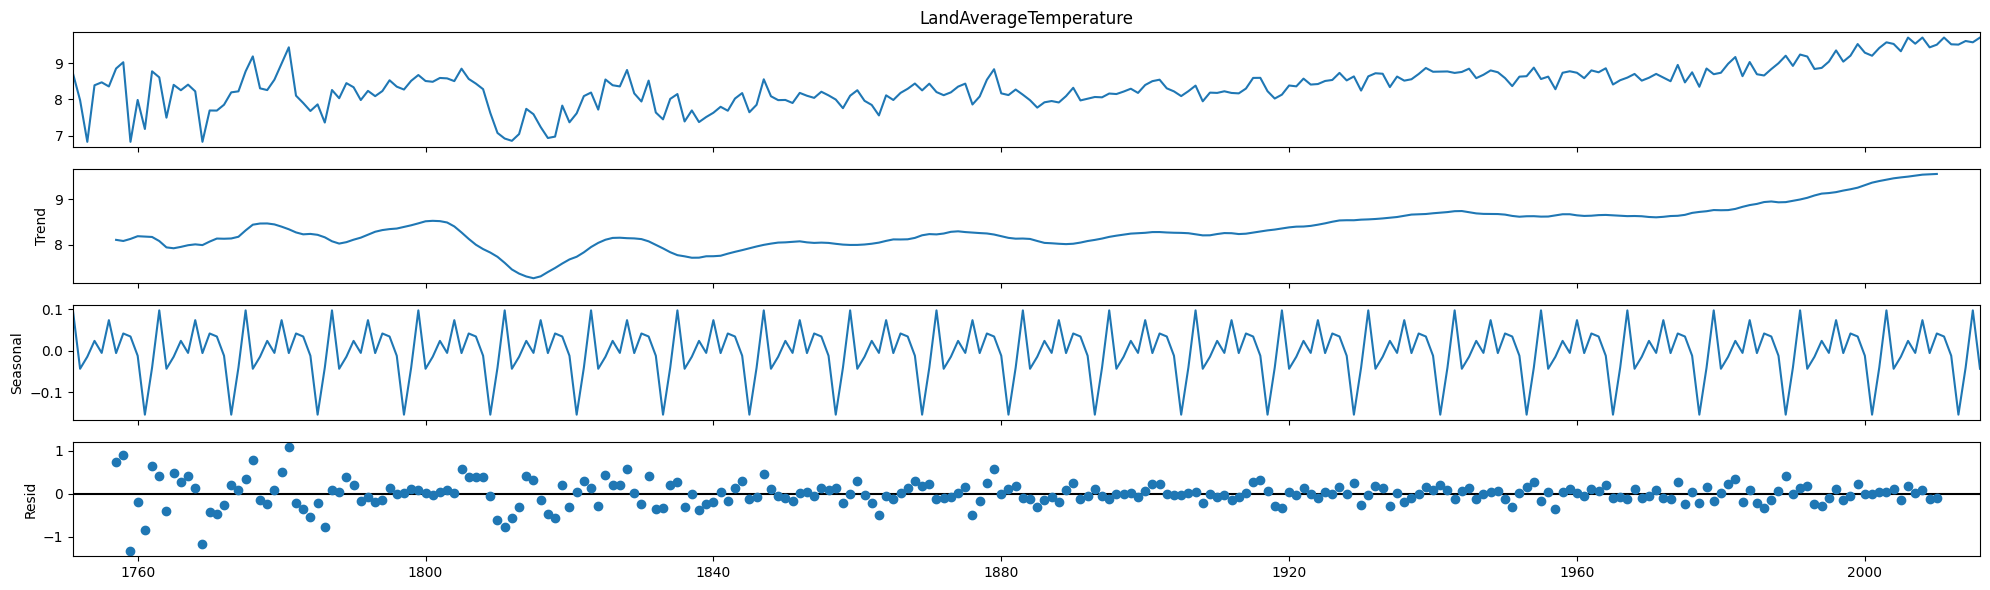

In [20]:
model_gl_1 = sm.tsa.seasonal_decompose(df_gl['LandAverageTemperature'], model = 'additive', period = 12)
model_gl_1.plot();

### FORECAST Modelling

In [21]:
# creating a function for evaluating the performance of model
def model_performance(actual, predicted):
    print("MAE : ", round(mae(actual, predicted),3))
    print("RMSE : ", round(mse(actual, predicted)**0.5,3))
    print("MAPE : ", round(mape(actual, predicted),3))

In [22]:
# train and test data split
train_x = df_gl.loc[df_gl['LandAverageTemperature'].index < df_gl['LandAverageTemperature'].index[-10]].copy()
test_x = df_gl.loc[df_gl['LandAverageTemperature'].index >= df_gl['LandAverageTemperature'].index[-10]].copy()

test_x

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
dt,,,,,,,,,
2006-12-31,9.532500,0.090000,15.262000,0.149583,3.864833,0.138333,15.813500,0.061000,2006.0
2007-12-31,9.701675,0.089500,15.533083,0.128833,4.009250,0.137167,15.827333,0.059083,2007.0
2008-12-31,9.431750,0.078917,15.191750,0.103500,3.724833,0.129833,15.721250,0.057250,2008.0
2009-12-31,9.505250,0.085917,15.266583,0.107750,3.796917,0.126000,15.827167,0.058917,2009.0
2010-12-31,9.701675,0.083417,15.449000,0.103417,4.023917,0.115667,15.895500,0.058583,2010.0
2011-12-31,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000,2011.0
2012-12-31,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500,2012.0
2013-12-31,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667,2013.0
2014-12-31,9.570667,0.090167,15.313583,0.111667,3.877750,0.139000,15.913000,0.063167,2014.0


##### Simple Exponential Smoothing

MAE :  0.127
RMSE :  0.153
MAPE :  0.013


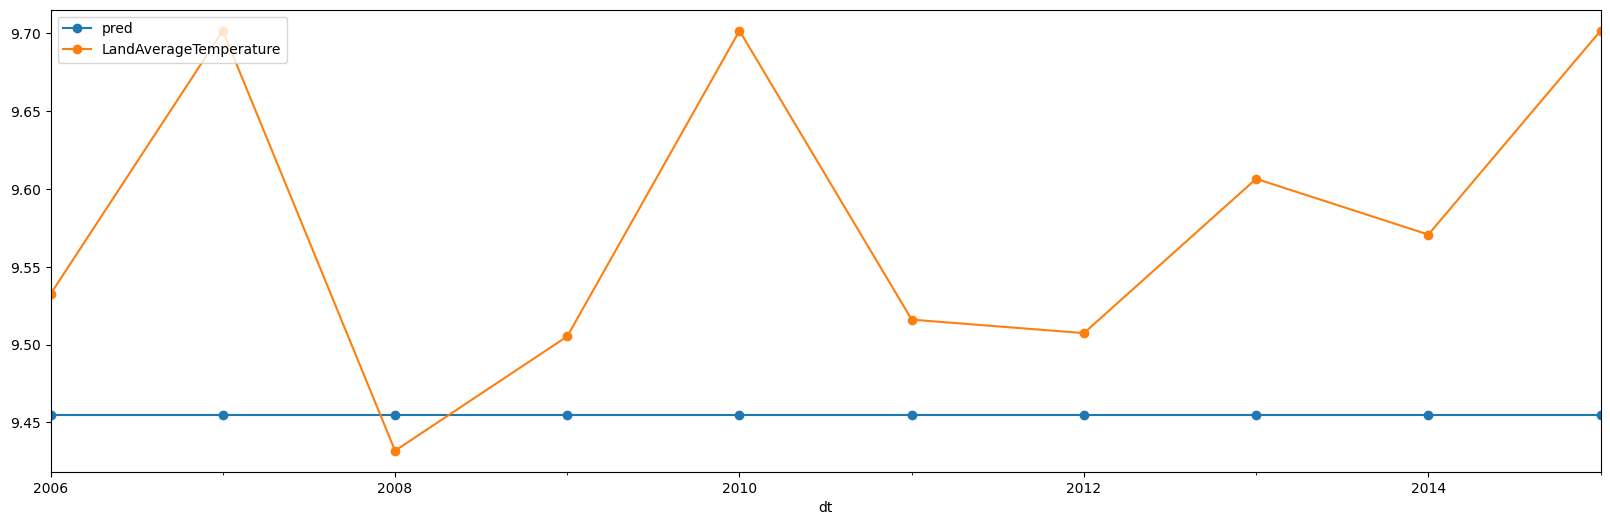

In [23]:
model_gl_ses = sm.tsa.SimpleExpSmoothing(train_x['LandAverageTemperature'])
model_gl_ses = model_gl_ses.fit(0.25, optimized = False)

# making predictions
test_x['pred'] = model_gl_ses.forecast(10)
test_x['pred']

# plotting
test_x['pred'].plot(legend = 'ses',style = "-o")
test_x['LandAverageTemperature'].plot(legend= "original",style = '-o')
plt.legend(loc = 'upper left')

# analyzing the performance
model_performance(test_x['LandAverageTemperature'], test_x['pred'])

Observation

<br>
<br>
sdfsfdv
lorem ipusim

##### Double Exponential Smoothing

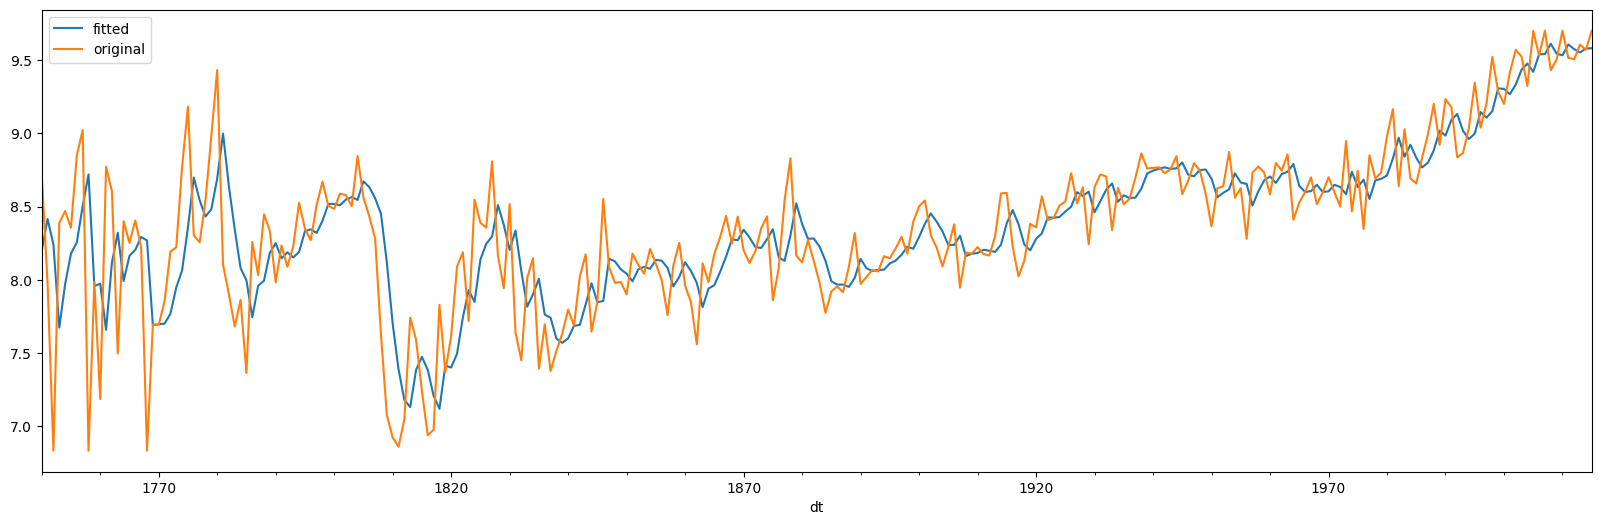

In [24]:
model = sm.tsa.ExponentialSmoothing(df_gl["LandAverageTemperature"], trend='add').fit()
model.fittedvalues.plot(label='fitted')
df_gl["LandAverageTemperature"].plot(label='original')
plt.legend()

MAE :  0.074
RMSE :  0.09
MAPE :  0.008


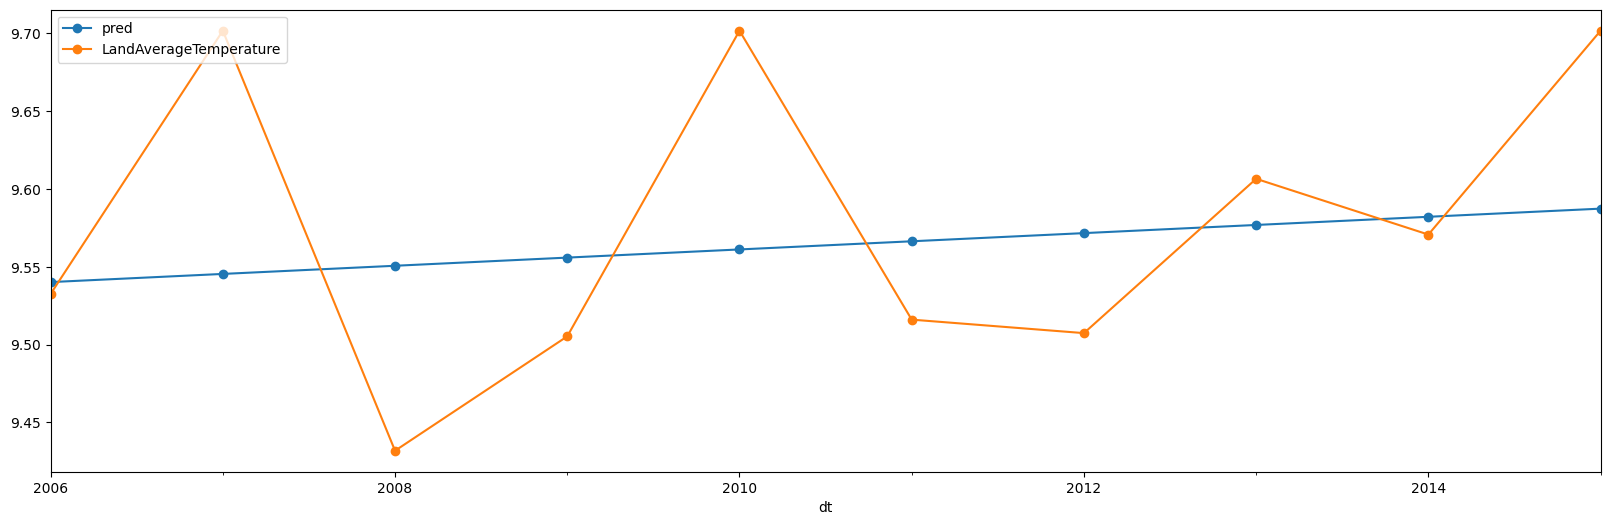

In [25]:
model_gl_des = sm.tsa.ExponentialSmoothing(train_x['LandAverageTemperature'], trend = 'add')
model_gl_des = model_gl_des.fit()

# making predictions
test_x['pred'] = model_gl_des.forecast(10)
test_x['pred']

# plotting
test_x['pred'].plot(legend = 'ses',style = "-o")
test_x['LandAverageTemperature'].plot(legend= "original",style = '-o')
plt.legend(loc = 'upper left')

# analyzing the performance
model_performance(test_x['LandAverageTemperature'], test_x['pred'])

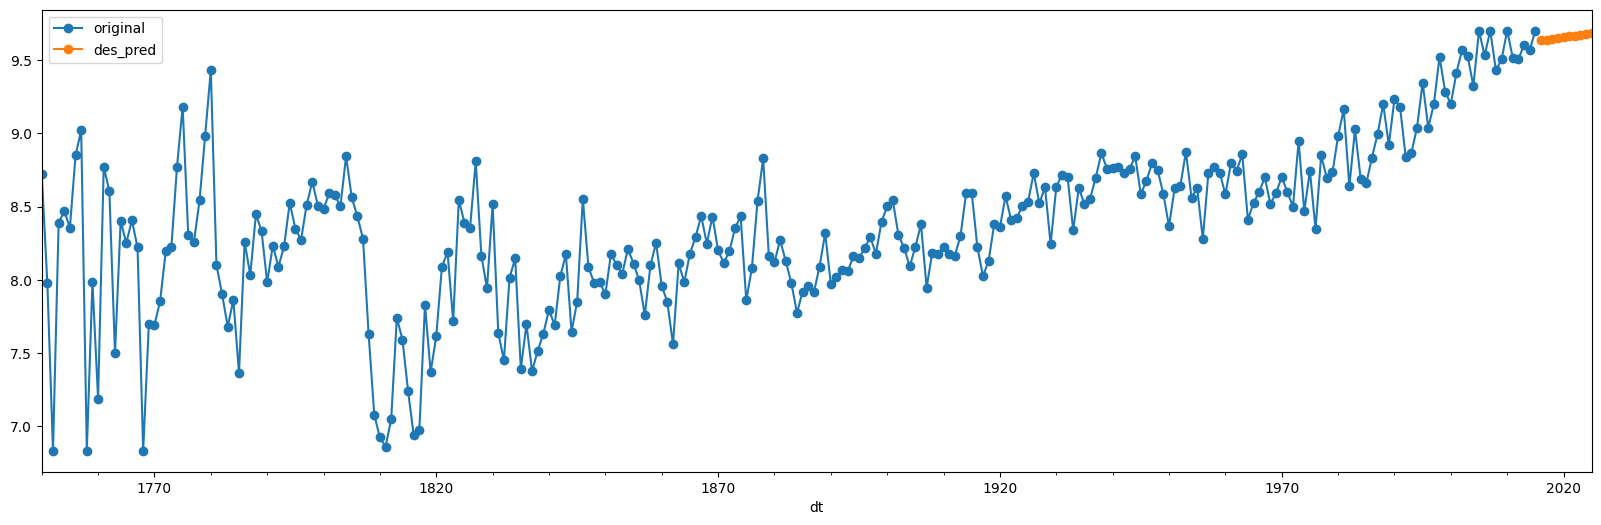

In [26]:
pred = model.forecast(10)

df_gl["LandAverageTemperature"].plot(label='original', style='-o')
pred.plot(label='des_pred', style='-o')
plt.legend()

Observation
<br>
<br>
da da da da

Check for stationarity using "dicky fuller test"

In [27]:
# sm.tsa.stattools.adfuller(df_gl['LandAverageTemperature'])[1]

def dickey_fuller_test(data, significance_level = 0.05):
    if sm.tsa.stattools.adfuller(data)[1]<= significance_level:
        print("sequence is stationary.")
    else:
        print("sequence is NOT stationary.")
        
dickey_fuller_test(df_gl['LandAverageTemperature'])
        

sequence is NOT stationary.


We need to make the sequence stationary first in order to use other time series models.

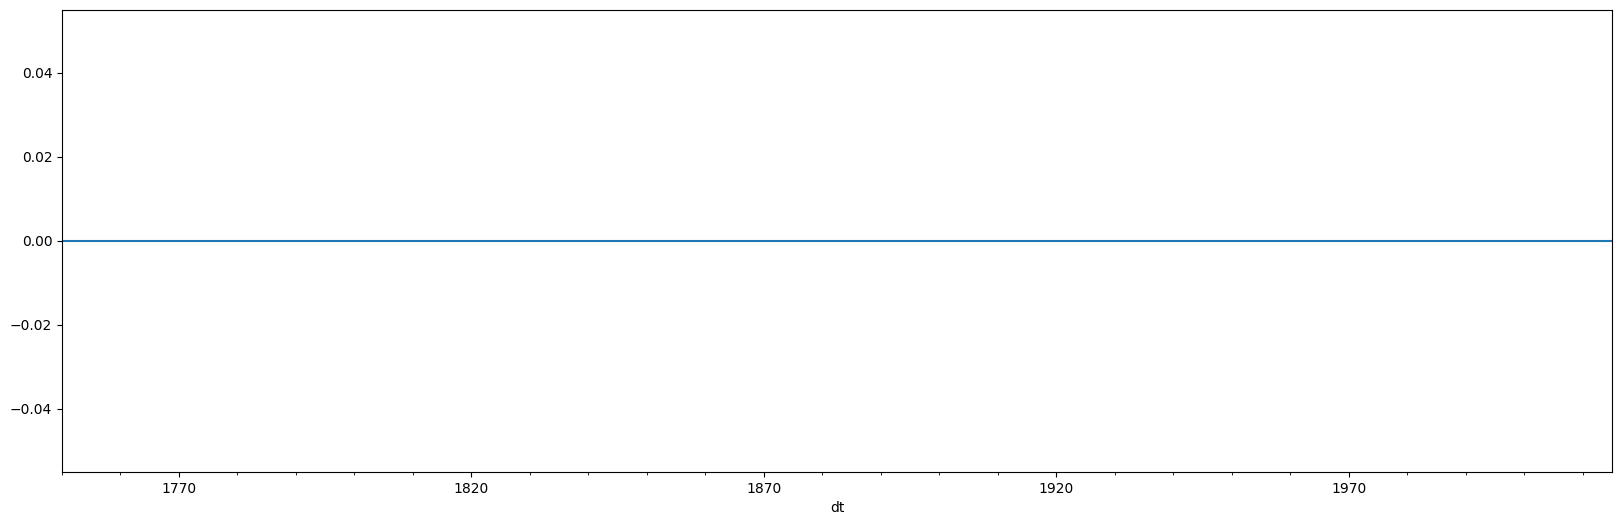

In [28]:
model = sm.tsa.seasonal_decompose(df_gl['LandAverageTemperature'], model= 'additive')
model.resid.plot();

This implies that time series data might not exhibit any consistent seasonal pattern. It could be relatively stable over time without any recurring **seasonal** fluctuations.

<Axes: xlabel='dt'>

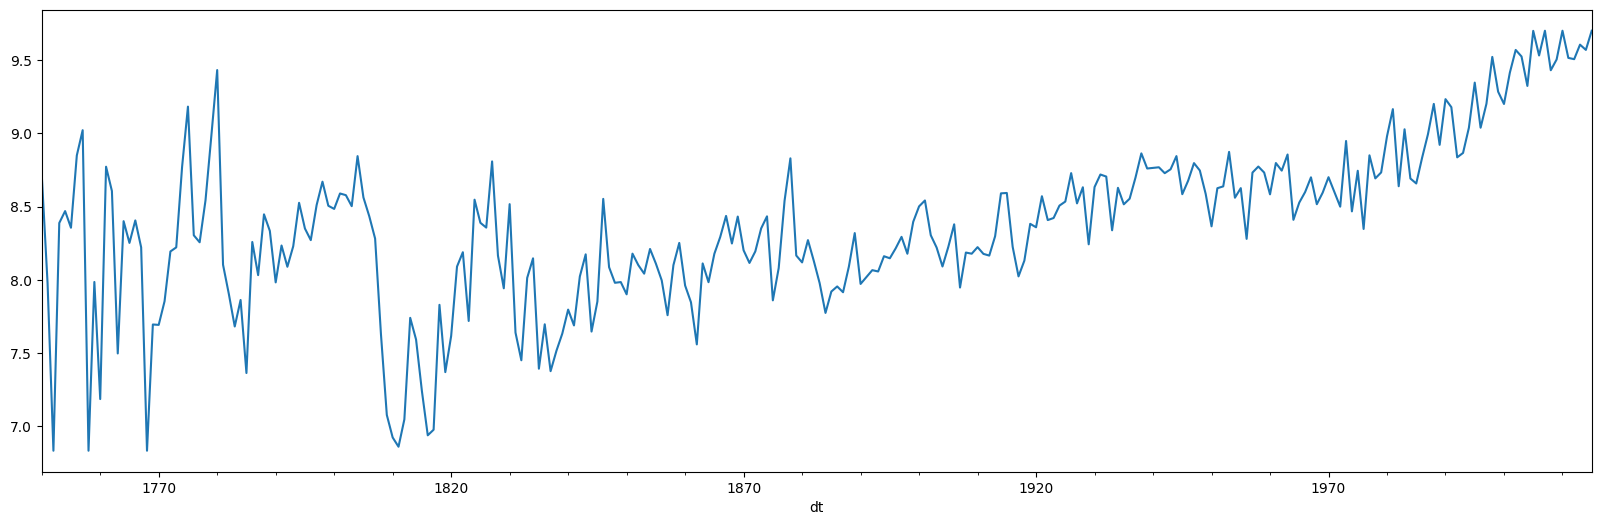

In [29]:
model.trend.plot()

<Axes: xlabel='dt'>

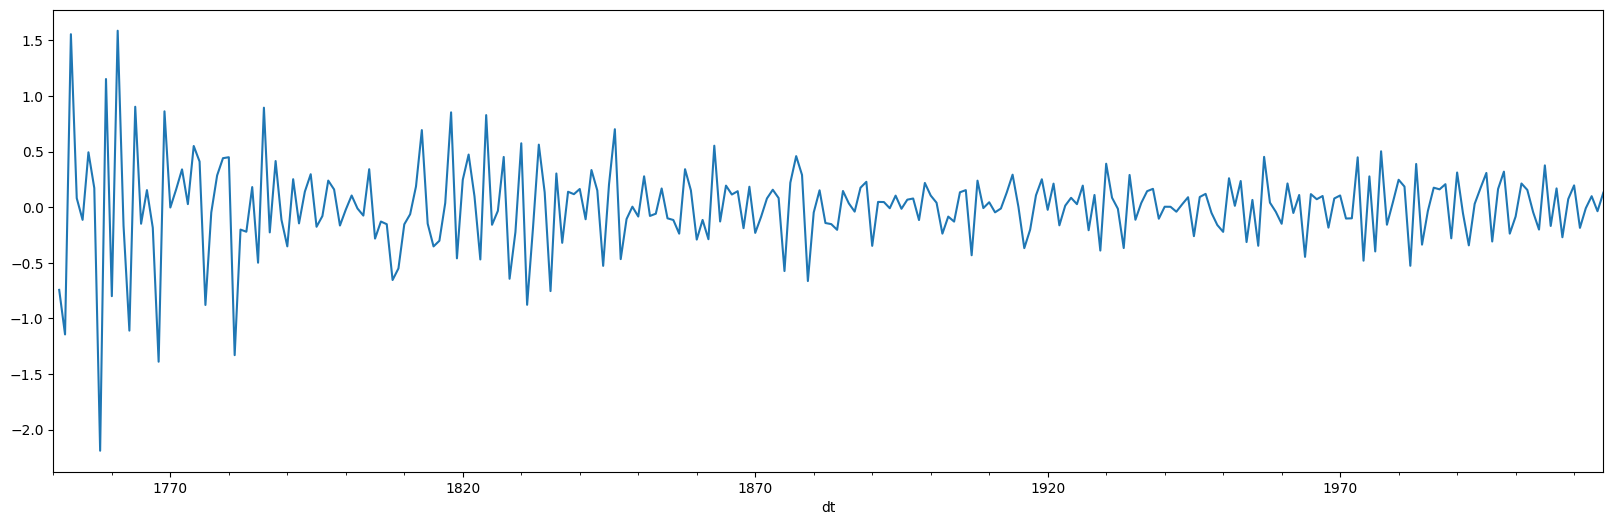

In [30]:
df_gl['LandAverageTemperature'].diff(1).plot()

In [31]:
# checking for null values after first order differencing
df_gl['LandAverageTemperature'].diff(1).isna().sum()

1

In [32]:
dickey_fuller_test(df_gl['LandAverageTemperature'].diff(1).dropna())

sequence is stationary.


#### Modelling through ARIMA family

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

<Axes: xlabel='dt'>

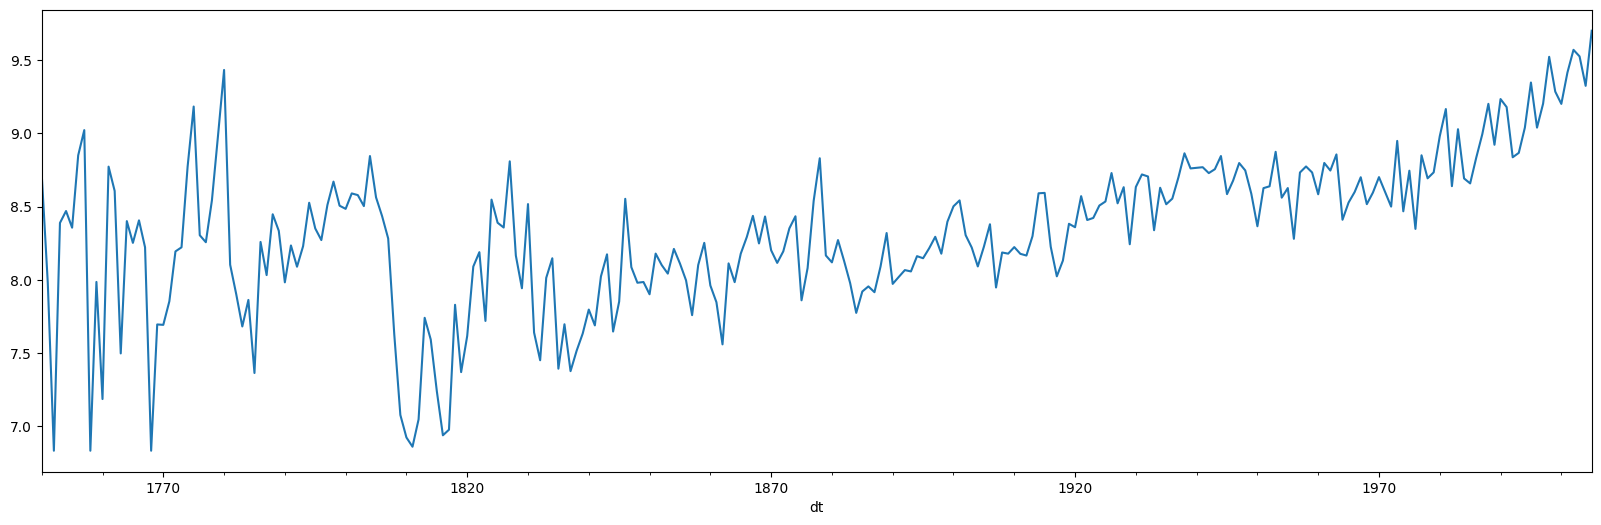

In [34]:
train_x['LandAverageTemperature'].plot()

In [35]:
# differentiating to make the train data stationary
train_x_st = train_x.copy()
train_x_st['LandAverageTemperature'] = train_x_st['LandAverageTemperature'].diff(1)
train_x_st.dropna(inplace = True)
train_x_st.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
dt,,,,,,,,,
1850-12-31,-0.083750,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167,1850.0
1851-12-31,0.277917,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083,1851.0
1852-12-31,-0.078417,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417,1852.0
1853-12-31,-0.058333,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833,1853.0
1854-12-31,0.168667,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417,1854.0


In [36]:
dickey_fuller_test(train_x_st['LandAverageTemperature'])

sequence is stationary.


1. AR

/tmp/ipykernel_18/3087592554.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



MAE :  0.09
RMSE :  0.111
MAPE :  0.009


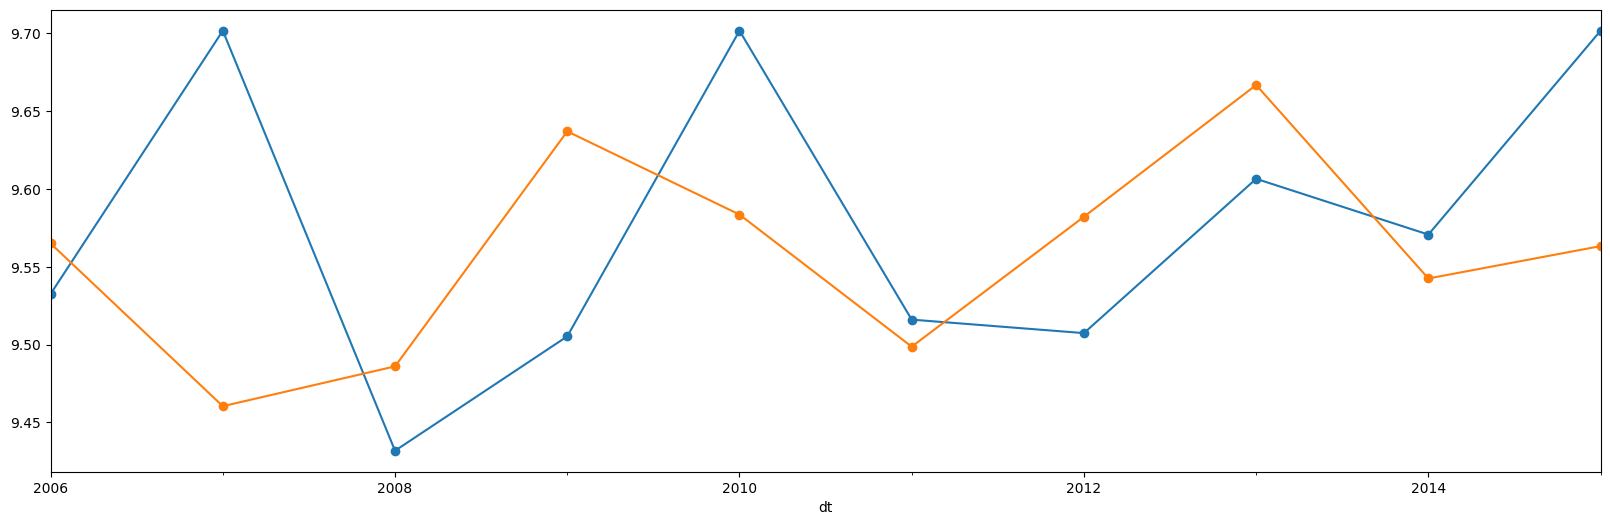

In [37]:
# model building
model_ar = SARIMAX(train_x_st['LandAverageTemperature'], order = (15,0,0))
model_ar = model_ar.fit(disp = False)

# making forecast/predictions
test_x['pred'] = model_ar.forecast(steps=10)

# integrating it back to non-stationary time series
test_x['pred'] = train_x["LandAverageTemperature"][-1] + test_x['pred'].cumsum()

# plotting 
test_x["LandAverageTemperature"].plot(style='-o')
test_x['pred'].plot(style = "-o")

# model performance
model_performance(test_x['LandAverageTemperature'], test_x['pred']) 

2.  MA

/tmp/ipykernel_18/330144438.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



MAE :  0.08
RMSE :  0.104
MAPE :  0.008


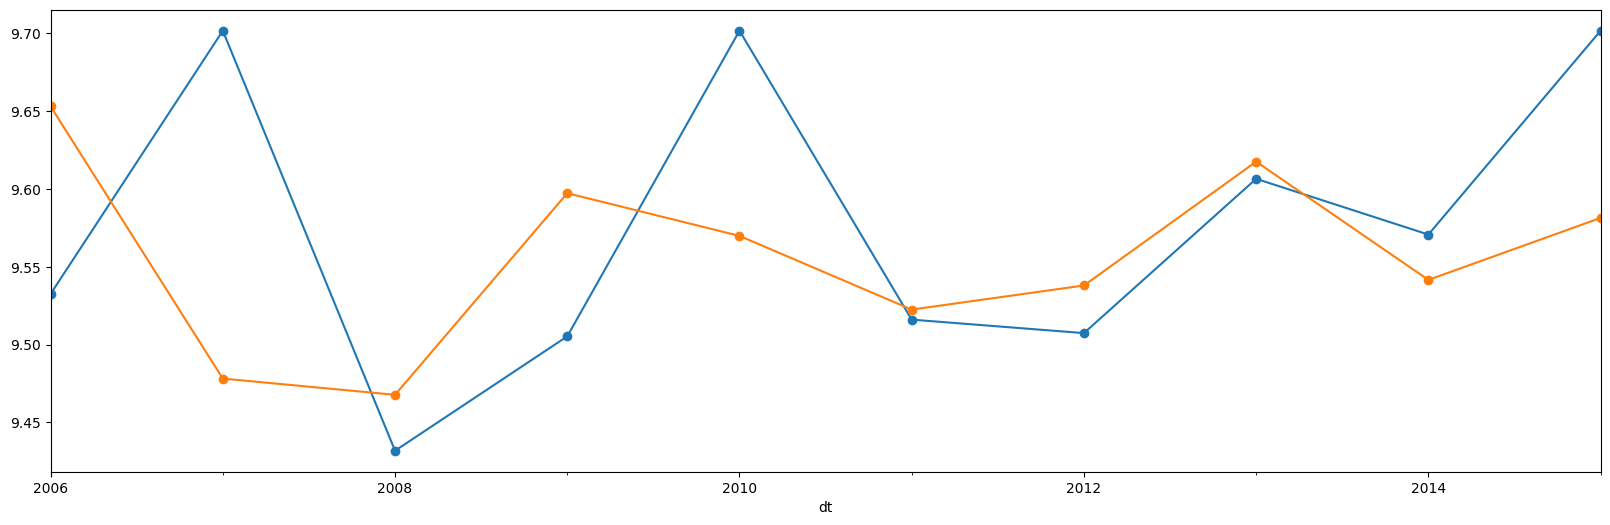

In [38]:
# model building
model_ma = SARIMAX(train_x_st['LandAverageTemperature'], order = (0,0,10))
model_ma = model_ma.fit(disp = False)

# making forecast/predictions
test_x['pred'] = model_ma.forecast(steps=10)

# integrating it back to non-stationary time series
test_x['pred'] = train_x["LandAverageTemperature"][-1] + test_x['pred'].cumsum()

# plotting 
test_x["LandAverageTemperature"].plot(style='-o')
test_x['pred'].plot(style = "-o")

# model performance
model_performance(test_x['LandAverageTemperature'], test_x['pred']) 

In [39]:
pred = model.forecast(10)

df_gl["LandAverageTemperature"].plot(label='original', style='-o')
pred.plot(label='des_pred', style='-o')
plt.legend()

AttributeError: 'DecomposeResult' object has no attribute 'forecast'

3. ARMA

In [ ]:
# model building
model_arma = SARIMAX(train_x_st['LandAverageTemperature'], order = (8,0,5))
model_arma = model_arma.fit(disp = False)

# making forecast/predictions
test_x['pred'] = model_arma.forecast(steps=10)

# integrating it back to non-stationary time series
test_x['pred'] = train_x["LandAverageTemperature"][-1] + test_x['pred'].cumsum()

# plotting 
test_x["LandAverageTemperature"].plot(style='-o')
test_x['pred'].plot(style = "-o")

# model performance
model_performance(test_x['LandAverageTemperature'], test_x['pred']) 

4. ARIMA

In [ ]:
# model building
model_arima = SARIMAX(train_x['LandAverageTemperature'], order = (12,1,8))
model_arima = model_arima.fit(disp = False)

# making forecast/predictions
test_x['pred'] = model_arima.forecast(steps=10)

# plotting 
test_x["LandAverageTemperature"].plot(style='-o')
test_x['pred'].plot(style = "-o")

# model performance
model_performance(test_x['LandAverageTemperature'], test_x['pred']) 

In [ ]:
model_arima = SARIMAX(df_gl['LandAverageTemperature'], order = (12,1,8))
model_arima = model_arima.fit(disp = False)

# making forecast/predictions
pred = model_arima.forecast(steps=10)

# plotting 
df_gl['LandAverageTemperature'].plot(style='-o')
pred.plot(style = "-o")